In [1]:
import numpy as np
import numpy.matlib
%matplotlib inline
import matplotlib.pyplot as plt

import QCLL
import makeData

In [2]:
# SET PARAMETER ::::::::::

nSample = 100
nQbits = 3  # the number of qubits
nParams = 18  # the number of parameter theta (18)
d = 100  # the number of dimensions for low dimensional side of count sketch matrix
nOut = 5  # the number of the dimensions of the output vectors

# SET PARAMETER ::::::::::

136.39858098921587
185.35686487451602
153.19500037512842
141.21571893582518
126.09389726011781
457.8334564216994
228.3855748748813
153.54577261437674
130.21854120393817
120.80920487406857
655.8507300986545
305.03485198477557
169.03034723127635
140.857118391028
116.51826888525034
238.05166673800608
150.00388657222868
115.39852707436205
248.03763498453336
161.57511768712016
122.13826077638126
112.67748642044546
536.2578091445477
260.33866885230026
165.97465218510743
140.6777673514145
107.70609813640725
2334.670389265479
523.4941480582258
206.4695191550012
141.97804093818564
105.43099848926808
189.50936497163806
161.3073658732083
99.26472579896387
4361.419619239428
1018.0840755849526
281.18642953263975
156.63770126113786
91.88984393640192
8140.399344491403
907.2405724387702
334.2261924344565
142.07713767376637
88.89153062960742
1006.1951378759773
120.25744339880228
81.04275843115224
8080.102009231577
911.7530111225967
321.17371208645784
62.973894902552345
2137.9700116022527
562.8472261793

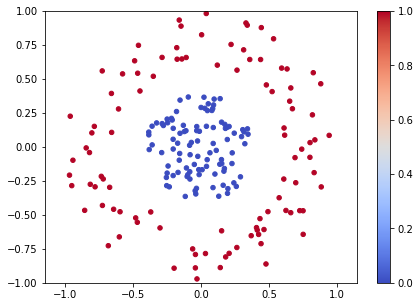

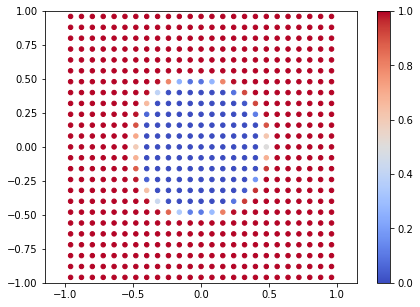

In [3]:
###
### Main


# Make input data: inDT
x0, x1 = makeData.makeInDT_classification(nSample)
inDT, ys = makeData.copyInDT_classification(x0, x1, nQbits)

# Perform QCLL for classification
F = QCLL.classification(nQbits, nParams, d, nOut)
F.fit(inDT, ys)

# loss: initial
init_loss = F.loss(inDT, ys, 'init')
print('Before optimization: init loss is {:.4f}'.format(init_loss))

# loss: final (= optimized)
loss = F.loss(inDT, ys, 'opt')
print('After optiization: loss is '.format(loss))


###
### Show figure

# (teature)
color = np.dot([0, 1], ys.transpose())
orgX = np.concatenate([x0, x1], axis=0)
# Plot
fig = plt.figure(figsize=(7,5))
im = plt.scatter(orgX[:,0], orgX[:,1], s=20, c=color, cmap = 'coolwarm')
fig.colorbar(im)
plt.axis('equal')
plt.ylim([-1, 1])
plt.xlim([-1, 1])
plt.show()

## (prediction)
# Make fig items for new input data
X_grid = makeData.makeInDT_grid()
inDT_grid = numpy.matlib.repmat(X_grid, 1, nQbits) # copy InDT
prob_grid = F.probability(inDT_grid, 'opt') # using optimized param
prob_grid = np.array(prob_grid)
color = np.dot([0, 1], prob_grid.transpose())
# Plot
fig = plt.figure(figsize=(7,5))
im = plt.scatter(X_grid[:,0], X_grid[:,1], s=20, c=color, cmap = 'coolwarm')
fig.colorbar(im)
plt.axis('equal')
plt.ylim([-1, 1])
plt.xlim([-1, 1])
plt.show()
